In [5]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import metricas_plots

In [2]:
importlib.reload(metricas_plots)
from metricas_plots import PlotsMetricas, T, F
p = PlotsMetricas()

In [14]:
larguras = [t for t in p.targets[:4]]
linhas = [l.replace('ew', 'flux') for l in larguras]

## Análise Exploratória

In [19]:
dados = pd.read_csv("dados/ariel_limpo_log10.csv.gz", compression="gzip")
print(dados.shape)

(125819, 22)


In [20]:
print(dados.columns)

Index(['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
       'mass', 'Av', 'nii_6584_flux', 'halpha_flux', 'oiii_5007_flux',
       'hbeta_flux', 'nii_6584_ew', 'halpha_ew', 'oiii_5007_ew', 'hbeta_ew',
       'nii_halpha_ew', 'oiii_hbeta_ew', 'nii_halpha_flux', 'oiii_hbeta_flux'],
      dtype='str')


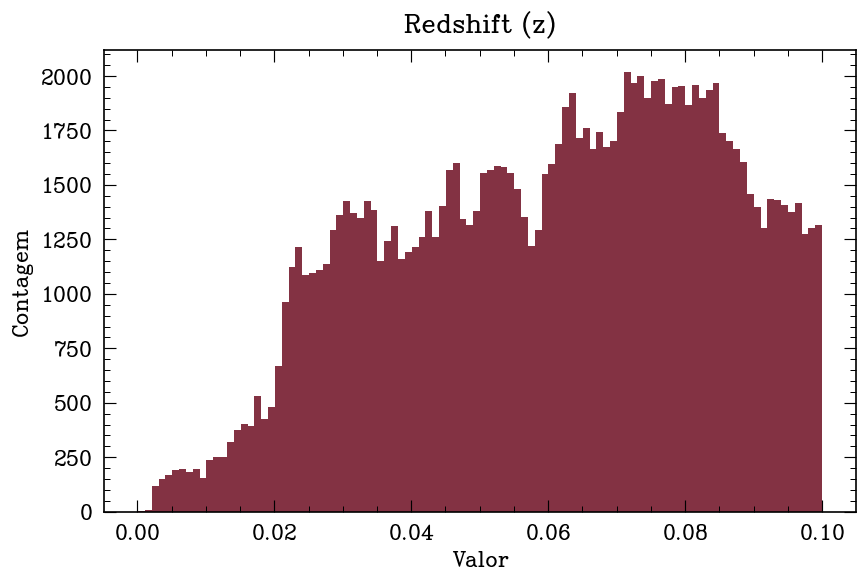

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5*p.phi, 5))
p.histogram_v(dados["z"], "Redshift (z)", ax, cor="#833243")
plt.show()

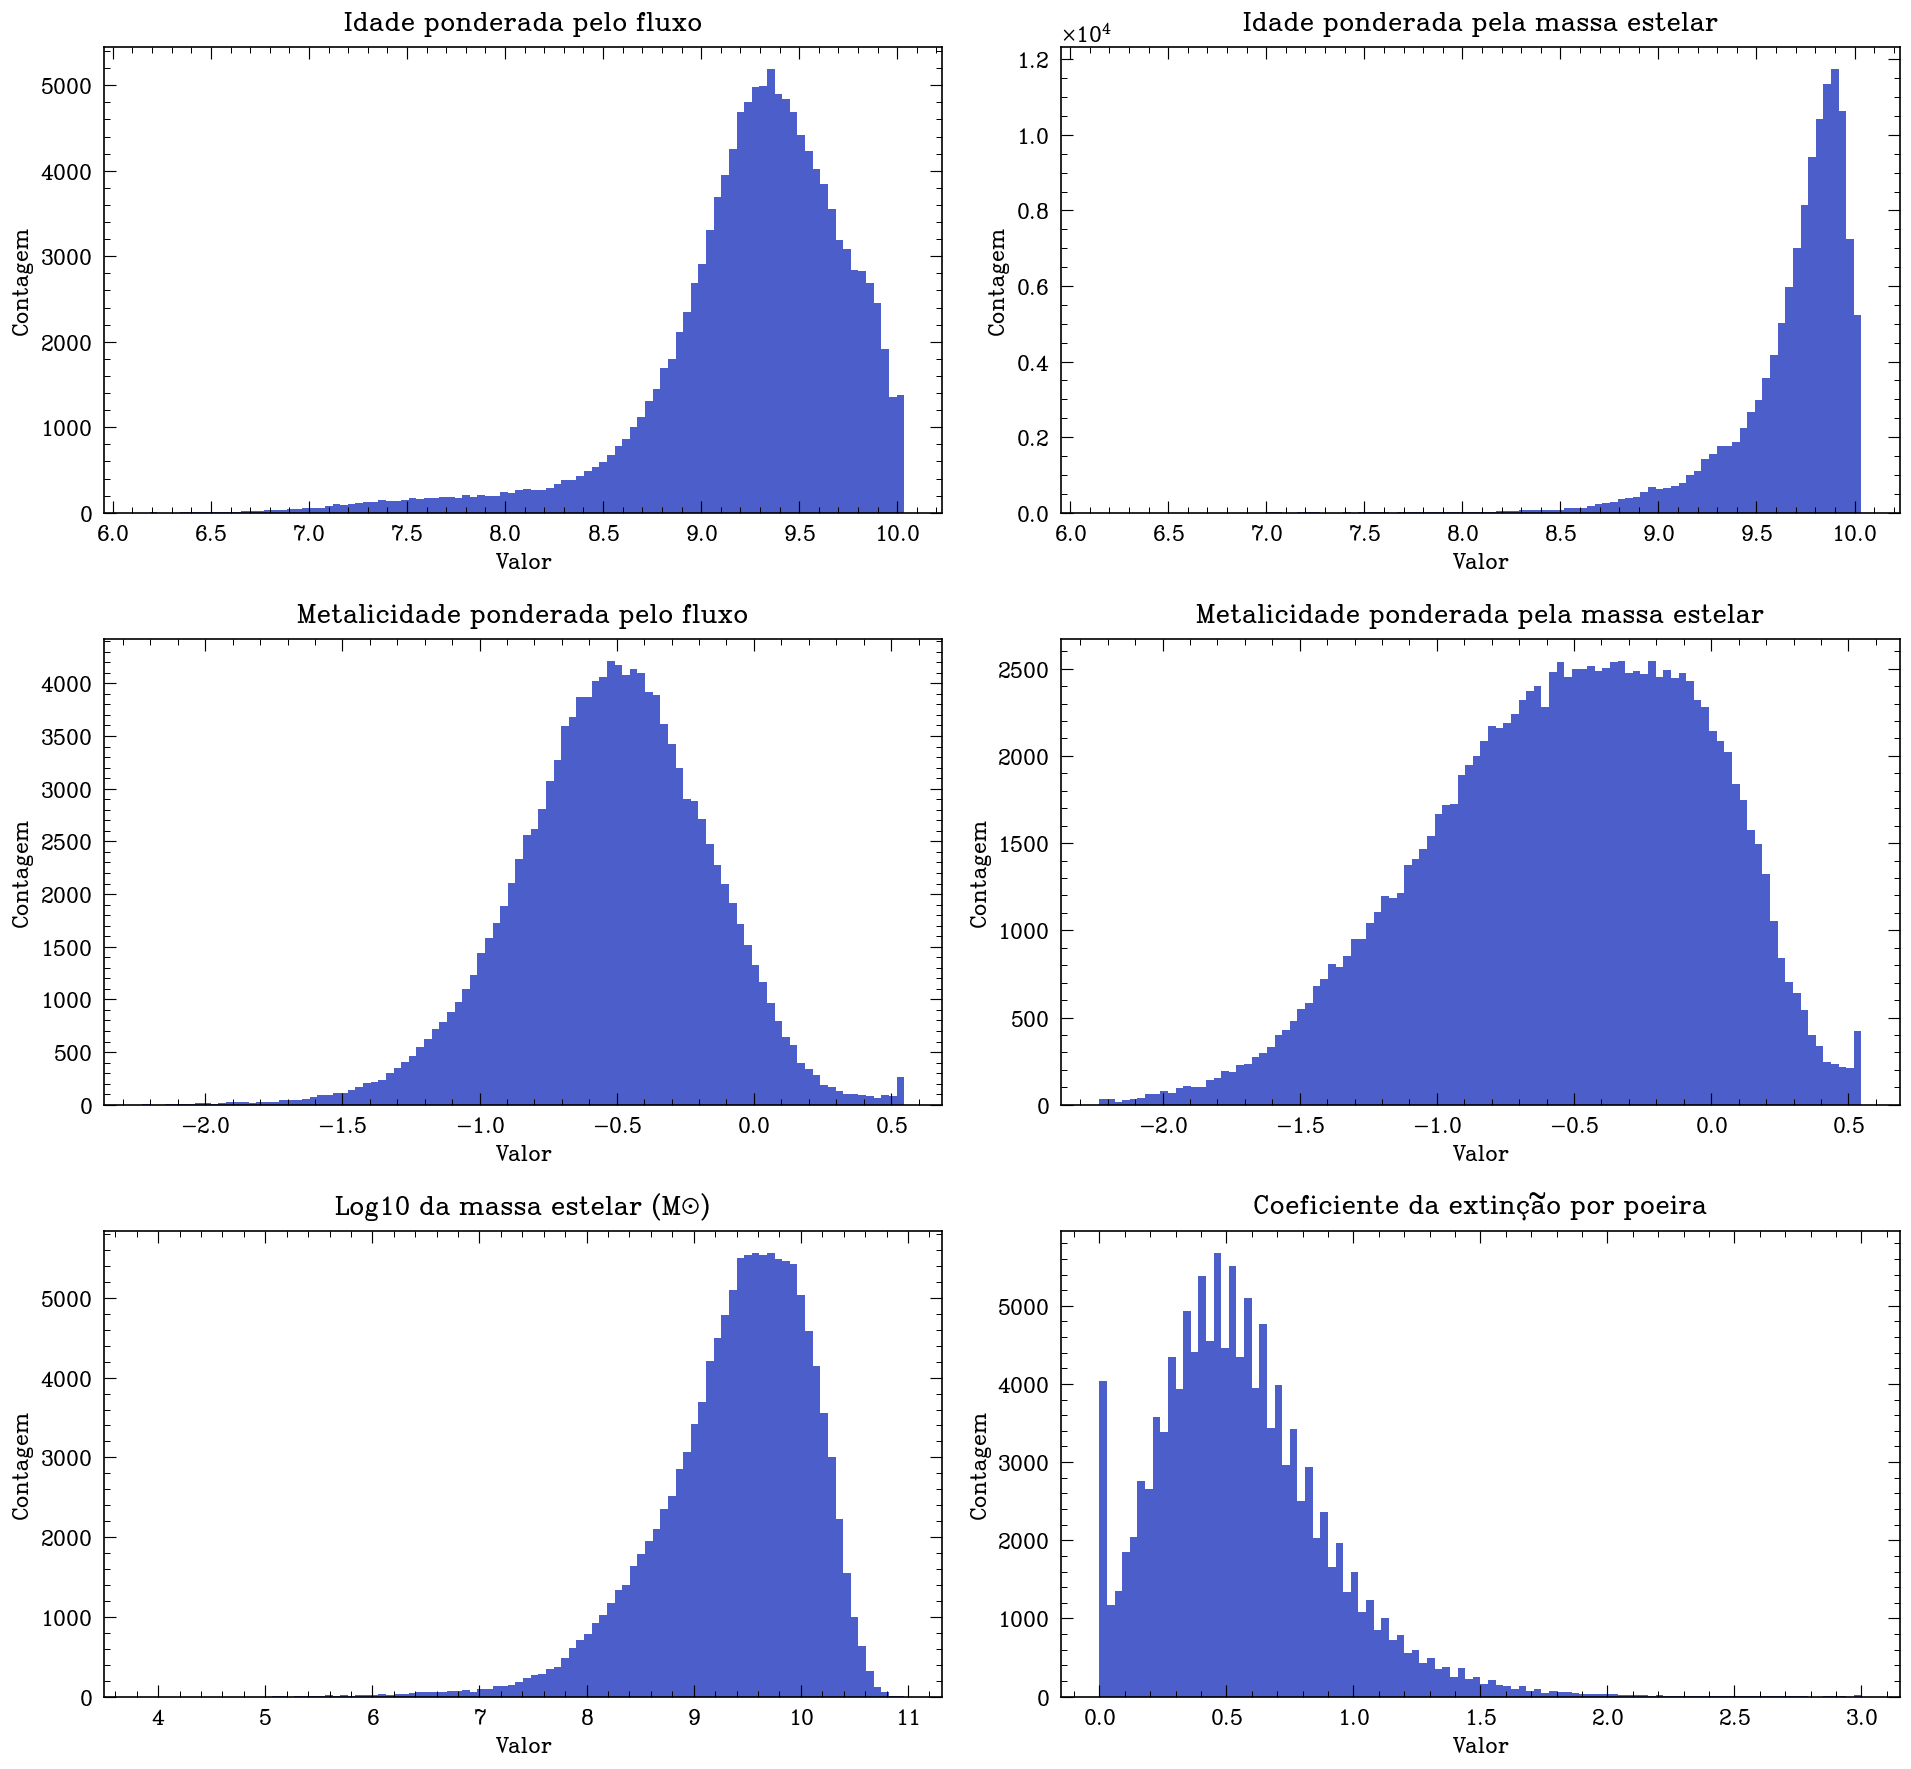

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(10*p.phi, 15))
p.histogram_v(dados["atflux"], "Idade ponderada pelo fluxo", axs[0][0], cor="#4B5EC9")
p.histogram_v(dados["atmass"], "Idade ponderada pela massa estelar", axs[0][1], cor="#4B5EC9")
p.histogram_v(dados["aZflux"], "Metalicidade ponderada pelo fluxo", axs[1][0], cor="#4B5EC9")
p.histogram_v(dados["aZmass"], "Metalicidade ponderada pela massa estelar", axs[1][1], cor="#4B5EC9")
p.histogram_v(dados["mass"], 'Log10 da massa estelar (M☉)', axs[2][0], cor="#4B5EC9")
p.histogram_v(dados["Av"], 'Coeficiente da extinção por poeira', axs[2][1], cor="#4B5EC9")
plt.tight_layout()
plt.show()

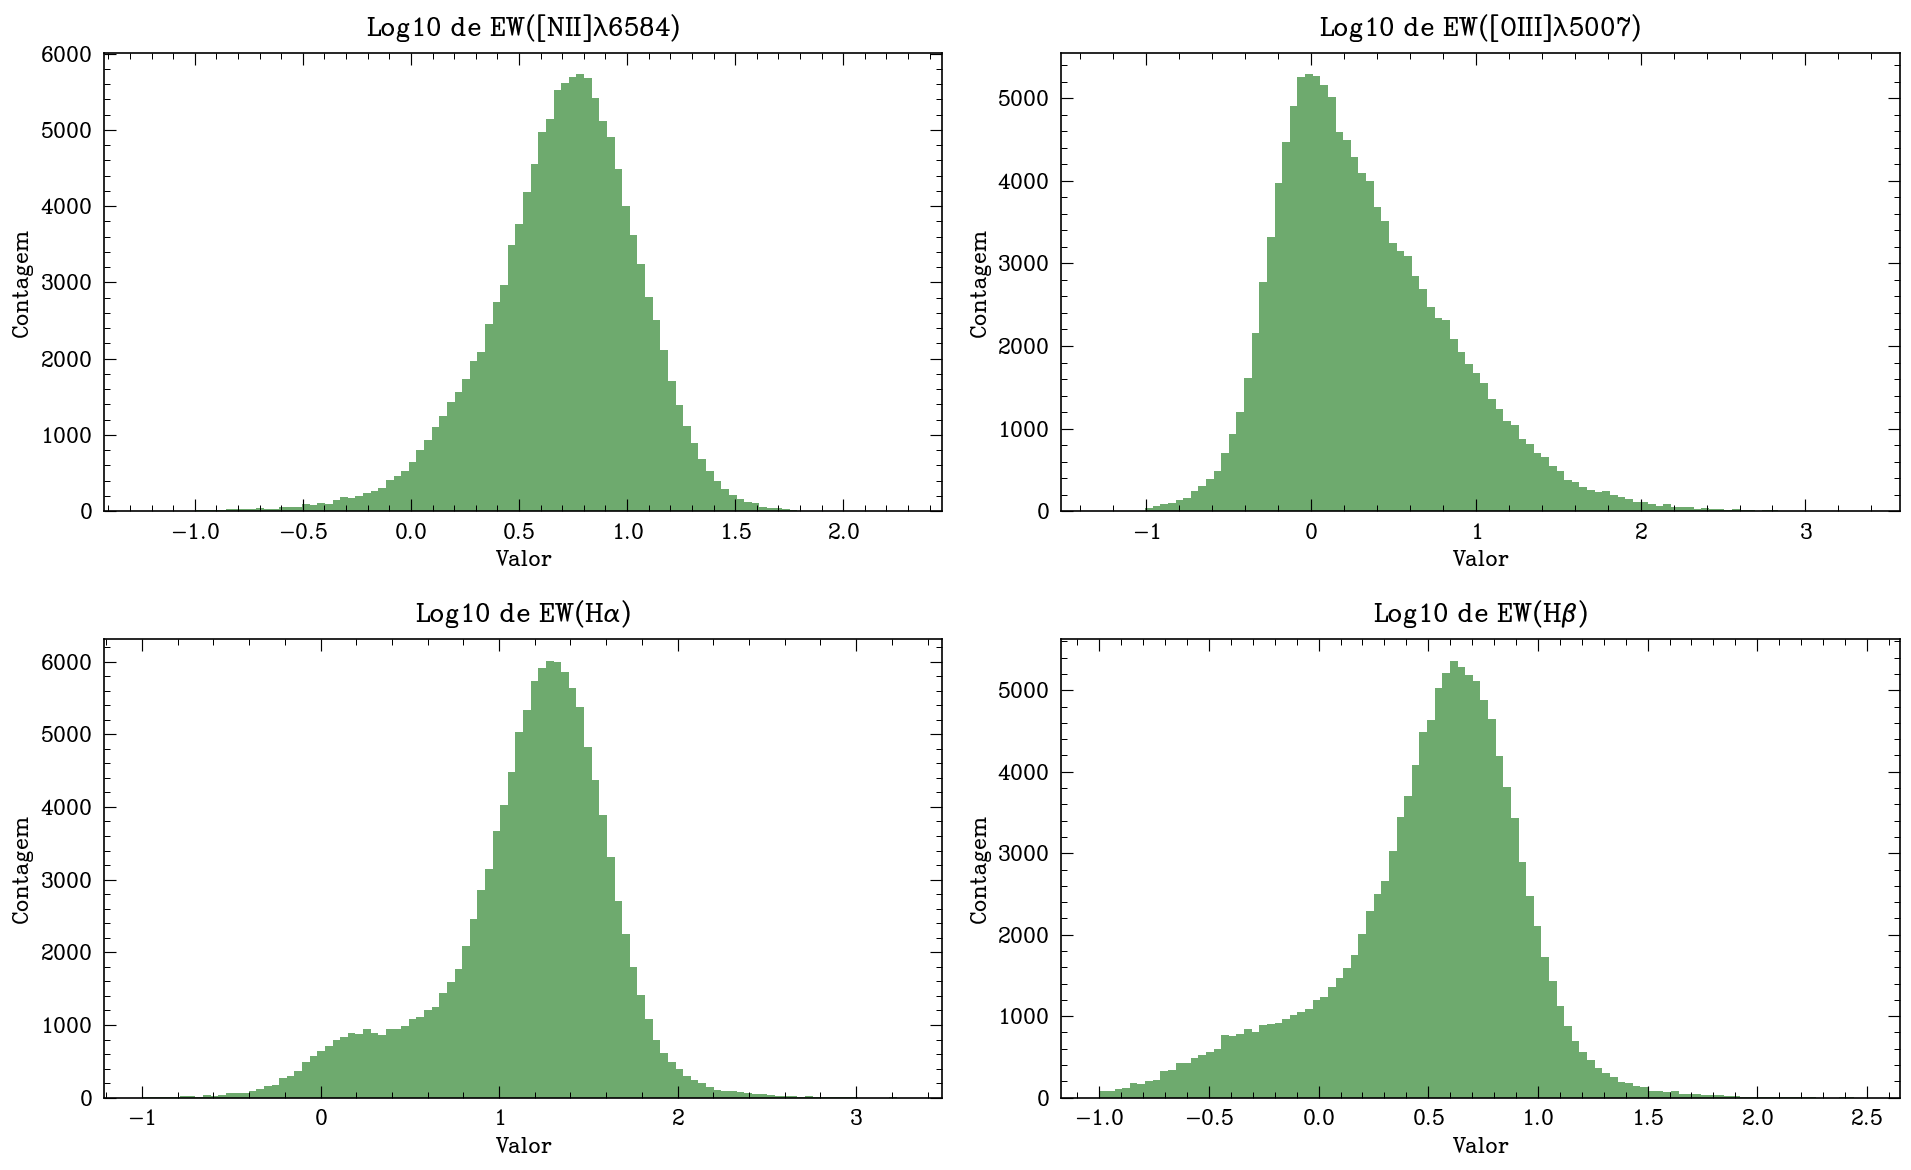

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10*p.phi, 10))
p.histogram_v(dados["nii_6584_ew"], r"Log10 de EW([NII]$\lambda6584$)", axs[0][0], cor="#6EAA6E")
p.histogram_v(dados["oiii_5007_ew"], r"Log10 de EW([OIII]$\lambda5007$)", axs[0][1], cor="#6EAA6E")
p.histogram_v(dados["halpha_ew"], r"Log10 de EW(H$\alpha$)", axs[1][0], cor="#6EAA6E")
p.histogram_v(dados["hbeta_ew"], r"Log10 de EW(H$\beta$)", axs[1][1], cor="#6EAA6E")
plt.tight_layout()
plt.show()

## Correlações

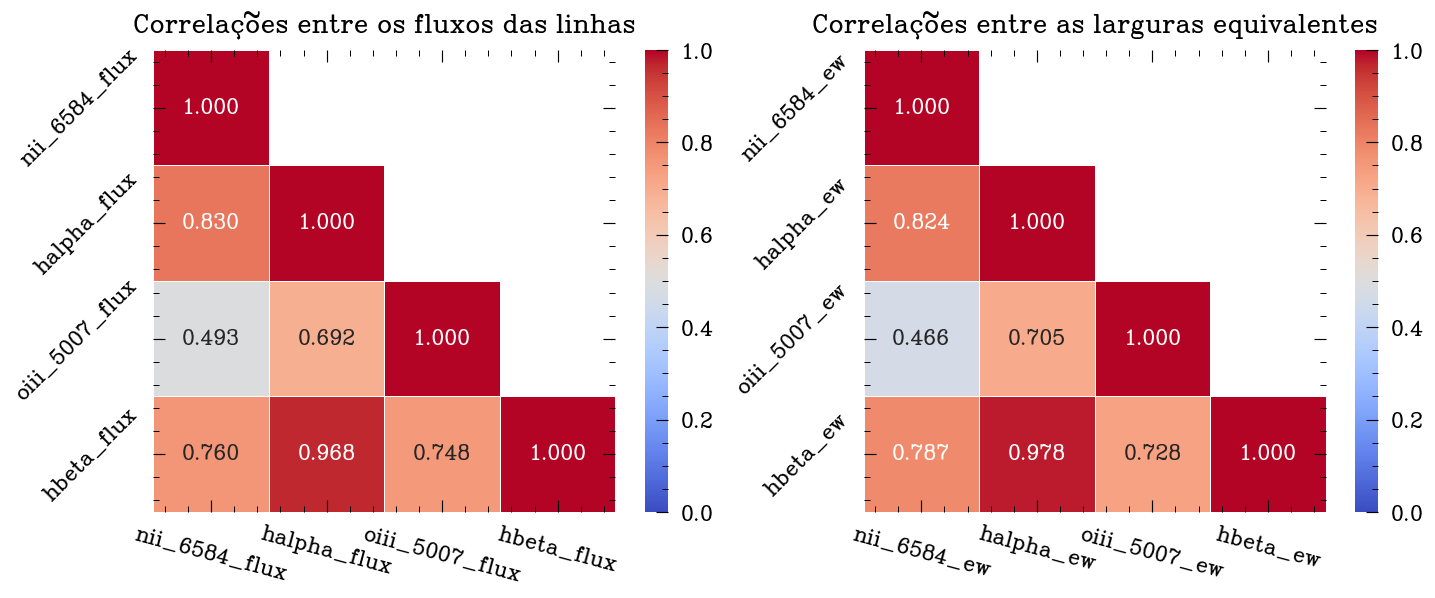

In [ ]:
corr1 = dados.loc[:, linhas].corr()
corr2 = dados.loc[:, larguras].corr()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
p.plot_corr(corr1, axs[0], linhas, 'Correlações entre os fluxos das linhas')
p.plot_corr(corr2, axs[1], larguras, 'Correlações entre as larguras equivalentes')
plt.show()

## Diagramas de diagnóstico

In [32]:
M = int(dados.shape[0] * 0.20) # 20% dos dados
dados_ = dados.sample(n=M, random_state=4321).reset_index().copy()
print(dados_.shape)

(25163, 23)


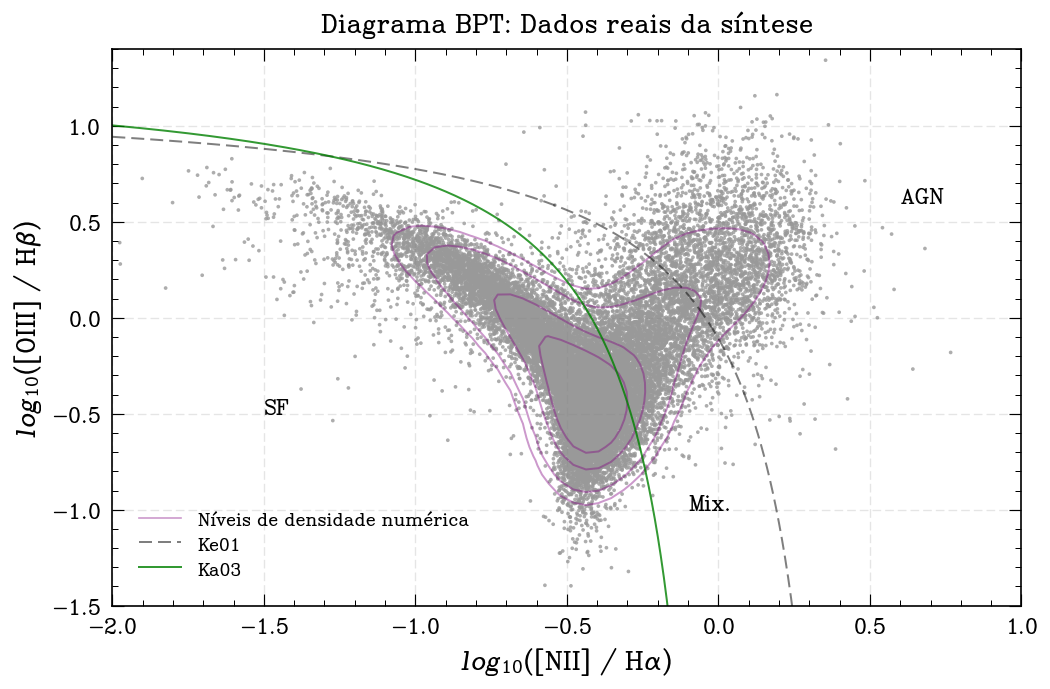

In [90]:
def show_bpt(color=None):
    plt.figure(figsize=(9, 6))
    if color is None:
        plt.scatter(dados_[T.nii_ha_f.value], dados_[T.oiii_hb_f.value], color='#999999', alpha=0.8, s=5, edgecolors='none')
        p.curvas_densidade(dados_[T.nii_ha_f.value], dados_[T.oiii_hb_f.value])
    else:
        scatter = plt.scatter(dados_[T.nii_ha_f.value], dados_[T.oiii_hb_f.value], c=dados_[color].values, 
                              alpha=0.8, s=5, cmap='coolwarm', edgecolors='none')
        cbar = plt.colorbar(scatter)
        cbar.set_label(color, rotation=90, labelpad=2)
    p.bpt_config('Diagrama BPT: Dados reais da síntese')

show_bpt()

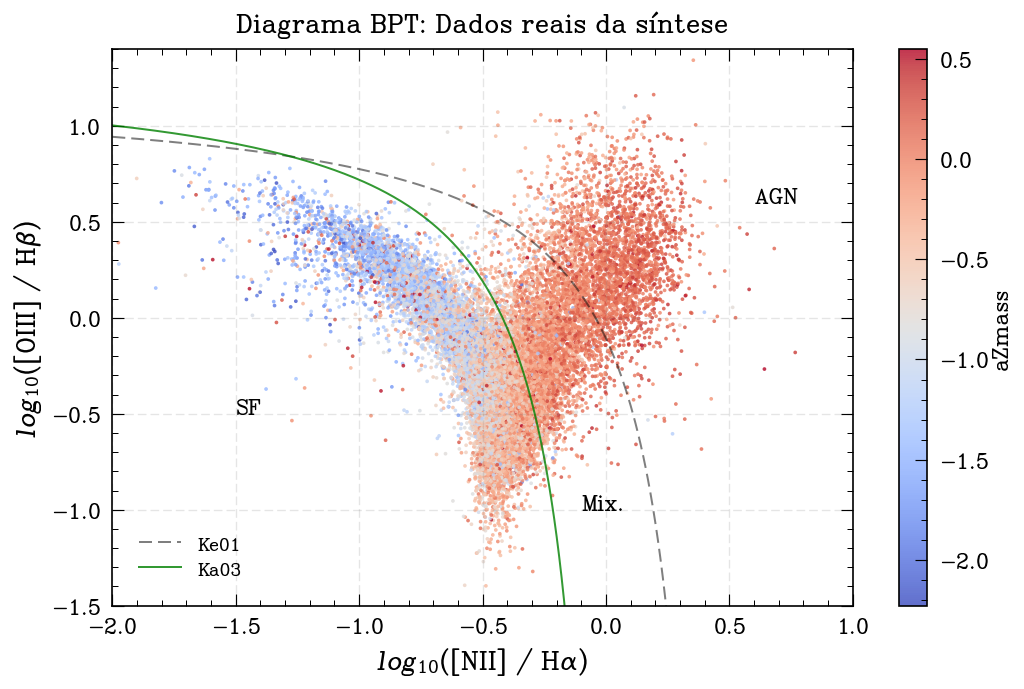

In [91]:
show_bpt(F.azmass.value)

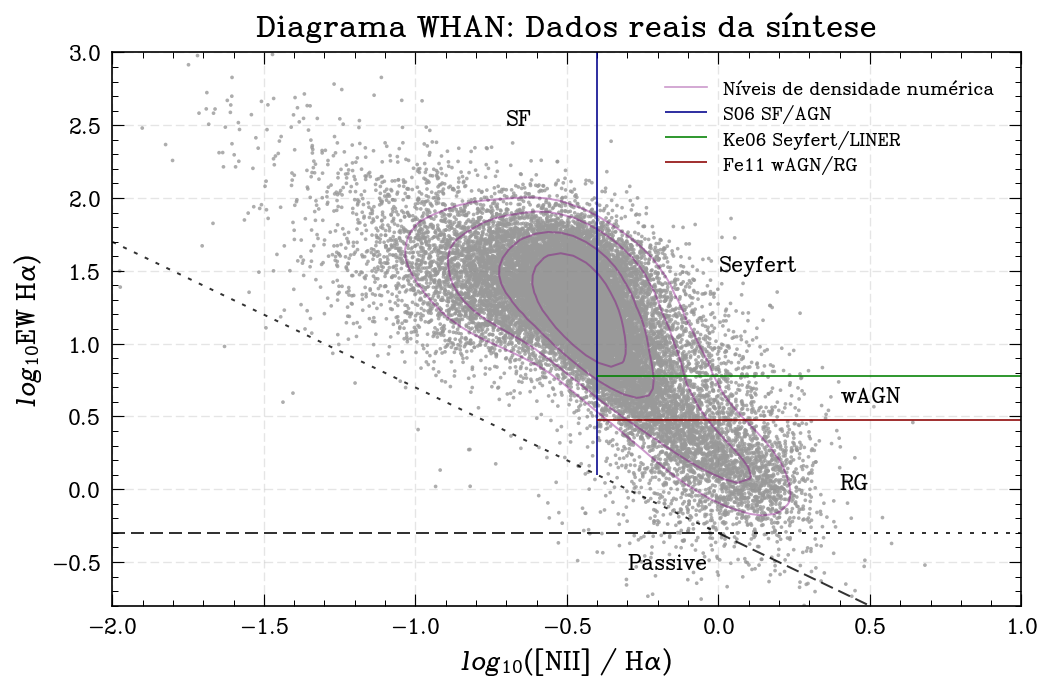

In [88]:
def show_whan(color=None):
    plt.figure(figsize=(9, 6))
    if color is None:
        plt.scatter(dados_[T.nii_ha_f.value] , dados_[T.ha.value], color="#999999", alpha=0.8, s=5, edgecolors='none')
        p.curvas_densidade(dados_[T.nii_ha_f.value] , dados_[T.ha.value])
    else:
        scatter = plt.scatter(dados_[T.nii_ha_f.value] , dados_[T.ha.value], c=dados_[color].values, 
                              alpha=0.8, s=5, cmap='coolwarm', edgecolors='none')
        cbar = plt.colorbar(scatter)
        cbar.set_label(color, rotation=90, labelpad=2)
    p.whan_config('Diagrama WHAN: Dados reais da síntese')

show_whan()

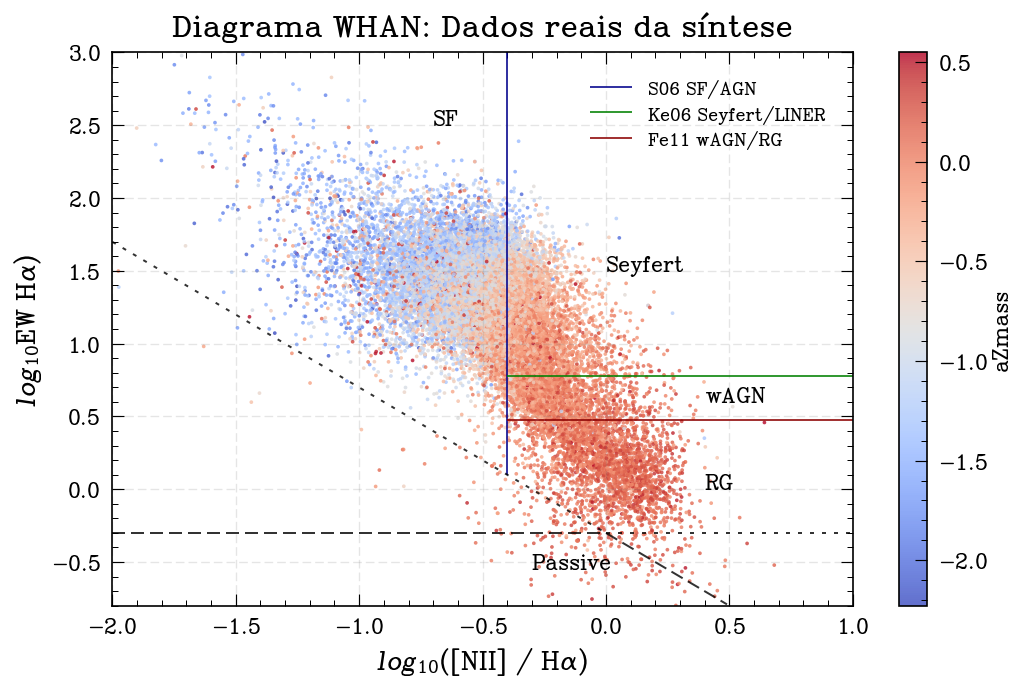

In [89]:
show_whan(F.azmass.value)

## Verificar importância das features para o treinamento

In [ ]:
# from sklearn.preprocessing import StandardScaler

for col in linhas:
    p.split_dados(dados, col)

# # Crie e ajuste o scaler aos dados de treinamento
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)  # Aplica fit e transform

# # Para dados de teste, use apenas transform (sem fit)
# # X_test_scaled = scaler.transform(X_test)

In [9]:
from pysr import PySRRegressor
help(PySRRegressor)

Help on class PySRRegressor in module pysr.sr:

class PySRRegressor(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
 |  PySRRegressor(model_selection: "Literal['best', 'accuracy', 'score']" = 'best', *, binary_operators: 'list[str] | None' = None, unary_operators: 'list[str] | None' = None, expression_spec: 'AbstractExpressionSpec | None' = None, niterations: 'int' = 100, populations: 'int' = 31, population_size: 'int' = 27, max_evals: 'int | None' = None, maxsize: 'int' = 30, maxdepth: 'int | None' = None, warmup_maxsize_by: 'float | None' = None, timeout_in_seconds: 'float | None' = None, constraints: 'dict[str, int | tuple[int, int]] | None' = None, nested_constraints: 'dict[str, dict[str, int]] | None' = None, elementwise_loss: 'str | None' = None, loss_function: 'str | None' = None, loss_function_expression: 'str | None' = None, loss_scale: "Literal['log', 'linear']" = 'log', complexity_of_operators: 'dict[str, int | float] | None' = None, c